The Taylor Series is an approximation of almost any function. It is polynomial (a linear combination of terms) with order $n$ centered around a point $a$. The equation is written as: 

$$ T_n f(x, a) = \sum_{k=0}^n \frac{f^{(k)}(a)}{k!}(x-a)^k \\ =f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \ldots + \frac{f^{(n)}(a)}{n!}(x-a)^n  $$

A few examples are given: 

$$ T_5 \sin(x) = \sin(a) + (x-a)\cos(a) - \frac{1}{2}(x-a)^2\sin(a) - \frac{1}{6}(x-a)^3 + \frac{1}{24}(x-a)^4\sin(a) + \frac{1}{120}(x-a)^5 \cos(a) $$ 

$$T_5 e^{bx} =  e^{ab} + be^{ab}(x-a) +\frac{1}{2}b^2e^{ab}(x-a)^2 + \frac{1}{6}b^3e^{ab}(x-a)^3 + \frac{1}{24}b^4 e^{ab}(x-a)^4 + \frac{1}{120}b^5e^{ab}(x-a)^5 $$


A common way of simplyfying these approximations is centering the function around 0, i.e., $a = 0$. We find that 
 $$ \sin(x) \approx x - \frac{x^3}{6} + \frac{x^5}{120} $$
 $$ e^{bx} \approx 1 + b + \frac{b^2}{2}x^2 + \frac{b^3 }{6}x^3 + \frac{b^4}{24}x^4 + \frac{b^5}{120}x^5 $$ 
 
 
 
As one can see, the taylor expansion proves quite useful in converting 'complex' equations into linear polynomials. One can write a python function that does exactly this. 

In [888]:
import sympy as sy
import numpy as np 
from sympy.functions import sin, exp 
import matplotlib.pyplot as plt 
%matplotlib inline

In [889]:
x = sy.Symbol('x')
b = sy.Symbol('b')
B = sy.Symbol('B')
I_s = sy.Symbol('I_s')
U = sy.Symbol('U')
f = sin(x) 

def factorial(n):
    p = 1
    for i in range(n):
        p = p * (i + 1)
    return p
    

def taylor(function, a, n):
    i = 0 
    p = 0 
    while i <= n:
        p = p + (function.diff(x,i).subs(x,a))/factorial(i) * (x-a)**i 
        i += 1 
    return p

taylor(f, 0, 5)

x**5/120 - x**3/6 + x

In [890]:
def plot(f, x_lims): 
    x1 = np.linspace(x_lims[0], x_lims[1], num = 1000)
    y1 = []
    for j in range(1, 6):
        func = taylor(f, 0, j)
        for k in x1:
            y1.append(func.subs(x, k))
        plt.plot(x1, y1, label='order {}'.format(j))
        y1 = []    
    real_vals = [f.subs(x, k) for k in x1]
    plt.plot(x1, real_vals, label='function')
    plt.legend()
    plt.show()

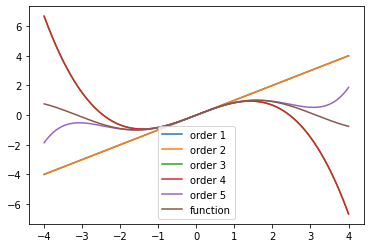

In [891]:
plot(f, x_lims = [-4, 4])

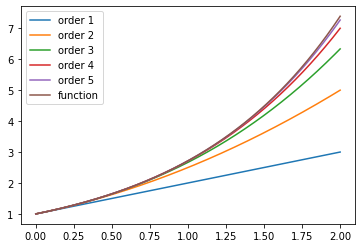

In [892]:
plot(f = exp(x), x_lims = [0, 2])

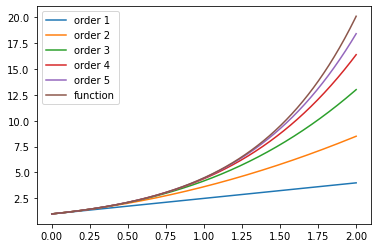

b**5*x**5/120 + b**4*x**4/24 + b**3*x**3/6 + b**2*x**2/2 + b*x + 1

In [893]:
# Note how when we introduce a value b >> 1, the approximation starts to fail. 
plot(f = exp(1.5*x), x_lims = [0, 2])
taylor(function = exp(b*x), a=0, n=5)

It is clear that this approximating will ultimately be not so good, since any coefficient will doom the linearization at low order terms. But for the sake of this tutorial, we say that it is good enough. 

Now that we have seen the results of the Taylor approximation, lets make an interlude into linear regression with pytorch: 

# Linear Regression Interlude

A simple graph of machine learning is seen below:
<img src="src/ml_simp.png" alt="Machine Learning" style="width: 500px;"/>

Using pytorch we can create tensors and gradients of those tensors. 
A tensor, as you konw, is a number, vector, matrix, or any n-dimensional array. 

Below we create some simple tensors

In [834]:
import numpy as np 
import torch 
np.random.seed(42) # Random seed for reproducibility

In [835]:
x = torch.tensor(3.) 
w = torch.tensor(4., requires_grad=True) 
b = torch.tensor(2., requires_grad=True)

print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(2., requires_grad=True)


Usual arithmetic operations apply

In [836]:
y = w*x + b 
print(y)

tensor(14., grad_fn=<AddBackward0>)


Why we use PyTorch, is becauase we can automatically compute the derivative of `y` with respect to the tensors that have `requires_grad` set to `True`, i.e., `w` and `b`. 

In [837]:
y.backward()

print('dy/dw', w.grad)
print('dy/db', b.grad)

dy/dw tensor(3.)
dy/db tensor(1.)


## Problem Statement 

Lets say we are in the lab and measuring the voltage drop across a LRC circuit with a diode at different currents to determine the emission coeffient $B$ from the equation written below:

$$ I(U) = I_s e^{BU} $$

where $U$ is the measured voltage accross the resistor. 
The unkown constants we wish to determine are $B$ and $I_s$. 

The taylor expansion of this equation is written below: 

$$ I \approx I_s + BI_sx + \frac{B^2I_s}{2}x^2 + \frac{B^3I_s}{6}x^3  $$ 

One can notice that the approximation is a combination of linear terms. Our linear regression model will aim to find those terms. 

So we create a toy model with values $B = 0.7$, $I_S = 0.8$

In [838]:
voltages = np.linspace(0, 2, num = 500, dtype='float32')

def toy_model(voltages, I_s1 = I_s1, B_1 = B_1):
    return I_s1*np.exp(B_1 * voltages)

I_s1 = 0.8
B_1 = 0.7


Our inputs will not be the voltages themselves, but rather an array to feed into the taylor polynomial, i.e., 

$$ input = [1, x, x^2, x^3] $$

So below we plot the taylor expansion of the toy model that we will try to approximate with PyTorch. 

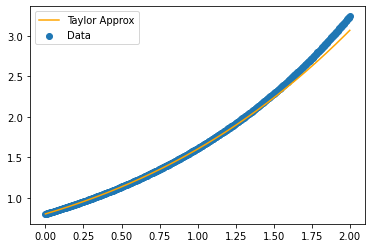

In [881]:
voltages_tay = np.array([[1, x, x**2, x**3] for x in voltages], dtype='float32') # input
taylor_weights = [I_s1, (B_1 * I_s1), (B_1**2 * I_s1) / (2) , (B_1**3 * I_s1) / (6)] # coefficients of taylor approx
approximation = taylor_weights @ voltages_tay.T # Matrix multiplication with transpose of coefficients


plt.plot(voltages, approximation, color='orange', label='Taylor Approx')
plt.scatter(voltages, toy_model(voltages), label='Data')
plt.legend()
plt.show()

Before we build a model to approximate the coefficients, we must convert the inputs and targets to PyTorch tensors. 

In [840]:
inputs = torch.from_numpy(voltages_tay)
targets = torch.from_numpy(toy_model(voltages))
# print(inputs.shape)
# print(targets)

### Linear Regression Model from scratch 

The *weights* and *biases* can also be represented as matricies, initialized with random values. The weights will take the same shape as the inputs, i.e., 

$$ weights = [w_1, w_2, w_3, w_4] $$ 
and hope that they end up as $$ weights = [I_s, BI_s, \frac{B^2I_s}{2}, \frac{B^3I_s}{6}] $$

The model is then simply a function that preforms a matrix multiplication of the input `voltages_tay` and the weights `w` (transposed), and adds the bias `b` (replicated for each observation). 

$$ V \times W^T + b$$ 

$$ 
\begin{bmatrix}
1, x_1, x_1^2, x_1^3 \\ 
\vdots, \vdots,  \vdots, \vdots\\ 
1, x_n, x_n^2, x_n^3
\end{bmatrix} \times 
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 
\end{bmatrix} + 
\begin{bmatrix}
b_1 \\ 
\vdots \\  
b_1 
\end{bmatrix} 
$$ 

In [841]:
def model(x):
    return x @ w.t() + b

We must initialize the weights and biases now: 

In [842]:
w = torch.randn(4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([0.3367, 0.1288, 0.2345, 0.2303], requires_grad=True)
tensor([-1.1229], requires_grad=True)


The resulting matrix is obtained by passing the input data to the model and is a set of predictions for the target variables (current)

In [843]:
preds = model(inputs)
# print(preds)
# print(targets)

### Loss Function 
We can compare the predictions with the actual targets using the following method. 
* Calculate the difference between the two matrices (`preds` and `targets`)
* Square all elements of the difference matrix to remove negative values 
* calculate the average of the elements in the resulting matrix 

The result is a single number known as the **mean squared error** (MSE). Intuitive! 

In [844]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff*diff) / diff.numel()


In [845]:
loss = mse(preds, targets)
print(loss)

tensor(2.6985, grad_fn=<DivBackward0>)


This number is called the **loss** because it indicates how shitty the model is at predicting the target variables. Lower the loss, better the model (not always but for the scope of this lesson, yes it is true). 

## Compute Gradients 

With PyTorch we can automatically compute the gradient or derivative of the `loss` with respect to the weights and biases (`requires_grad=True`)

In [846]:
loss.backward()

These gradients are then stored in the `.grad` attribute of the respective tensors, i.e., 

In [847]:
print(w)
print(w.grad)

tensor([0.3367, 0.1288, 0.2345, 0.2303], requires_grad=True)
tensor([-3.2584, -3.0956, -3.9306, -5.6592])


In [848]:
print(b)
print(b.grad)

tensor([-1.1229], requires_grad=True)
tensor([-3.2584])


Calculus tells us that the gradient indicates the rate of change of the loss, i.e., the slope of the loss function w.r.t to the weights and biases. 

Thus we know the following: 

- If gradient of weights or biases is positive:
    - **increasing** the elements value will **increase** the loss 
    - **decreasing** the elements value will **decrease** the loss 
    
<img src="src/pos_grad.png" alt="Machine Learning" style="width: 350px;"/>    

- if gradient of weights or biases is negative: 
    - **increasing** the elements value will **decrease** the loss 
    - **decreasing** the elements value will **increase** the loss 

<img src="src/neg_grad.png" alt="Machine Learning" style="width: 350px;"/>

[source](https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch)
The increase or decrease is proportional to the value of the gradient
So lets reset the gradients back to zero before moving forward, because PyTorch accumulates the gradients. 

In [849]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([0., 0., 0., 0.])
tensor([0.])


A method of adjusting the weights and biases is Gradient Descent

We will reduce the loss and improve our model using graedient descent algorithm, which goes roughly like this: 

1. Generate Predictions
2. Calculate the loss 
3. Compute the gradients w.r.t the weights and biases 
4. Adjust the weights by subtracting a small quantity proportional to the gradient 
5. Reset the gradients to zero

In [850]:
# Generate Predictions
preds = model(inputs)
# print(preds)

# Calculate Loss
loss = mse(preds, targets)
# print(loss) 

# Compute Gradients
loss.backward()

# Adjust weights and biases and reset gradients 
with torch.no_grad():
    w -= w.grad*1E-4
    b -= b.grad*1E-4
    w.grad.zero_()
    b.grad.zero_()
# print(w)

With new weights and biases, the model should have a lower loss: 

In [851]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(2.6907, grad_fn=<DivBackward0>)


### Train for mutliple epochs 
To reduce the loss even further, we must repeat the above process of adjusting the weights and biases using gradeints multiple times. Each iteration is dubbed an **epoch**. 

In [856]:
for _ in range(50000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad*1E-5
        b -= b.grad*1E-5
        w.grad.zero_()
        b.grad.zero_()
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(0.0026, grad_fn=<DivBackward0>)


So we can wait until the loss gets pretty low, and then check to find our parameters found in the weights. 

Recall that $$ weights = [I_s, BI_s, \frac{B^2I_s}{2}, \frac{B^3I_s}{6}] $$

Thus the $w_1$ would theoretically represent the saturation current, and $\frac{w_2}{I_s} = B$

Below we pull out the values and plot the machine learning derived taylor approximation. 

Weights
[1.0936418  0.4821594  0.34769985 0.02052989]

# I_s prediction, looking for 0.8
1.0936418 +/- 0.36584532

# B prediction, looking for 0.7
0.44087508 +/- 0.36584532


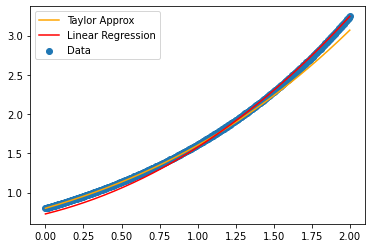

In [880]:
prediction_values = preds.detach().numpy()
prediction_weights = w.detach().numpy()
bias_value = b.detach().numpy()
I_pred = prediction_weights[0]
B_pred = prediction_weights[1] / I_pred
print('Weights')
print(prediction_weights)
print('\n# I_s prediction, looking for 0.8')
print(str(I_pred) + " +/- " + str(np.abs(bias_value[0]))) # 0.8
print('\n# B prediction, looking for 0.7')
print(str(B_pred) + ' +/- ' + str(np.abs(bias_value[0]))) # 0.7
# print(bias_value)
plt.plot(voltages, approximation, color='orange', label='Taylor Approx')
plt.scatter(voltages, toy_model(voltages), label='Data')
plt.plot(voltages, prediction_values, label='Linear Regression', color='red')
plt.legend()
plt.show()

## Using PyTorch built-ins

Let's redo this using built-in functions and classes from PyTorch

In [865]:
import torch.nn as nn 
from torch.utils.data import TensorDataset, DataLoader

In [868]:
# Dataset preperation 
train_ds = TensorDataset(inputs, targets)


batch_size = 5 
train_dl = DataLoader(train_ds, batch_size, shuffle=True) 
# next(iter(train_dl))

In [869]:
#Defining Model 
model=nn.Linear(4, 1)
# print(model.weight)
# print(model.bias)

opt = torch.optim.SGD(model.parameters(), lr=1E-5) # Stochastic Gradient Descent, as before

In [870]:
import torch.nn.functional as F 
loss_fn = F.mse_loss # same mean squared error loss
loss = loss_fn(model(inputs), targets) 
print(loss)

tensor(5.8228, grad_fn=<MseLossBackward>)


/home/fusionby2030/Uni_Ausgabe/school/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  This is separate from the ipykernel package so we can avoid doing imports until


In [871]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))



In [872]:
fit(1000, model, loss_fn, opt)

/home/fusionby2030/Uni_Ausgabe/school/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  import sys


Training loss:  tensor(0.5479, grad_fn=<MseLossBackward>)


/home/fusionby2030/Uni_Ausgabe/school/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if sys.path[0] == '':


Weights
[[ 0.72032714  0.11495685  0.35767964 -0.11588238]]

# I_s prediction
0.72032714 +/- 0.58778375

# B prediction
0.15958978 +/- 0.58778375


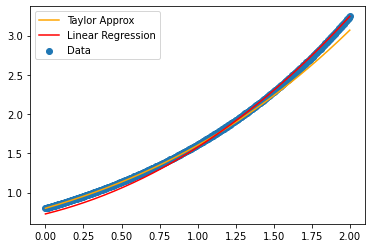

In [879]:
prediction_values = preds.detach().numpy()
prediction_weights = model.weight.detach().numpy()
bias_value = model.bias.detach().numpy()
I_pred = prediction_weights[0][0] #0.8
B_pred = prediction_weights[0][1] / I_pred # 0.7
B_pred_2 = np.sqrt(prediction_weights[0][2] * 2 / I_pred)
print('Weights')
print(prediction_weights)
print('\n# I_s prediction')
print(str(I_pred) + ' +/- ' + str(np.abs(bias_value[0])))
print('\n# B prediction')
print(str(B_pred) + ' +/- ' + str(np.abs(bias_value[0])))


# print(bias_value)
plt.plot(voltages, approximation, color='orange', label='Taylor Approx')
plt.scatter(voltages, toy_model(voltages), label='Data')
plt.plot(voltages, prediction_values, label='Linear Regression', color='red')
plt.legend()
plt.show()